<a href="https://colab.research.google.com/github/whyhowie/wang_DSPN_S25/blob/main/ExerciseSubmissions/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6: More plotting options

In this homework, you'll practice more advanced plotting options from `ggplot`.

Just like the prior homework, we will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

1. Multipanel figures 7/7
2. Increasing data density 3/3

---
# 1. Multipanel figures (7 points)

Last week, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

To start, load the `gapminder` dataset from the last set of exercises, as well as the `tidyverse`.

In [ ]:
# INSERT CODE HERE
# install.packages("gapminder")
# install.packages("tidyverse")

library("tidyverse")
library("gapminder")
head(gapminder)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Next, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

n_distinct(country)
<int>
25


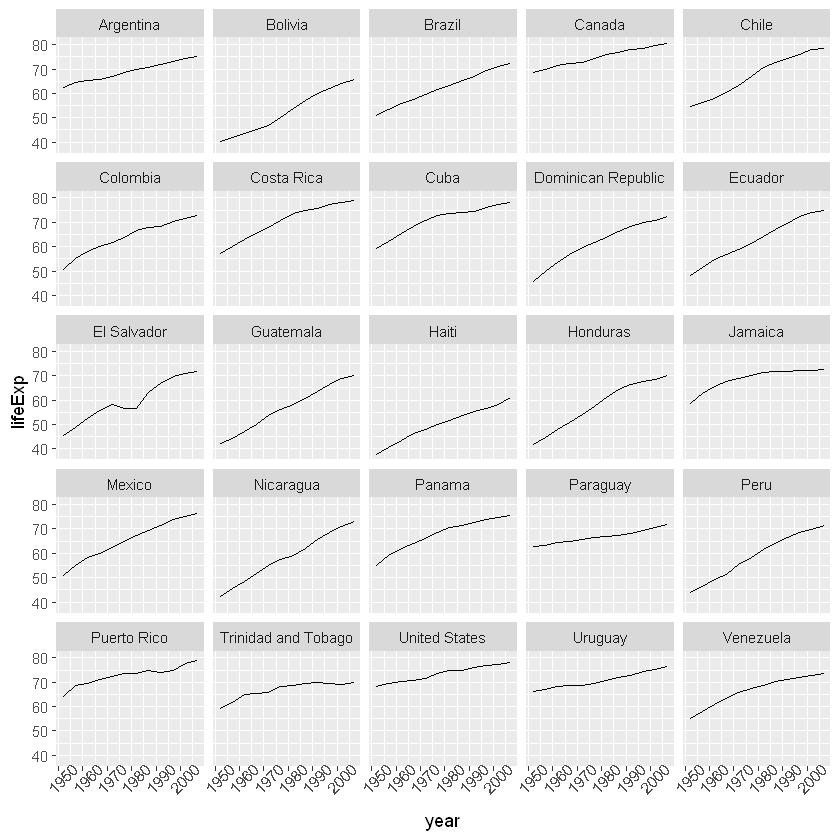

In [ ]:
# INSERT CODE HERE
americas_data <- gapminder |>
    filter(continent == "Americas")

summarize(americas_data, n_distinct(country)) # verify the number of countries

ggplot(americas_data, aes(x = year, y = lifeExp)) +
    geom_line() +
    facet_wrap(~ country) +
	theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) # need justification



Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

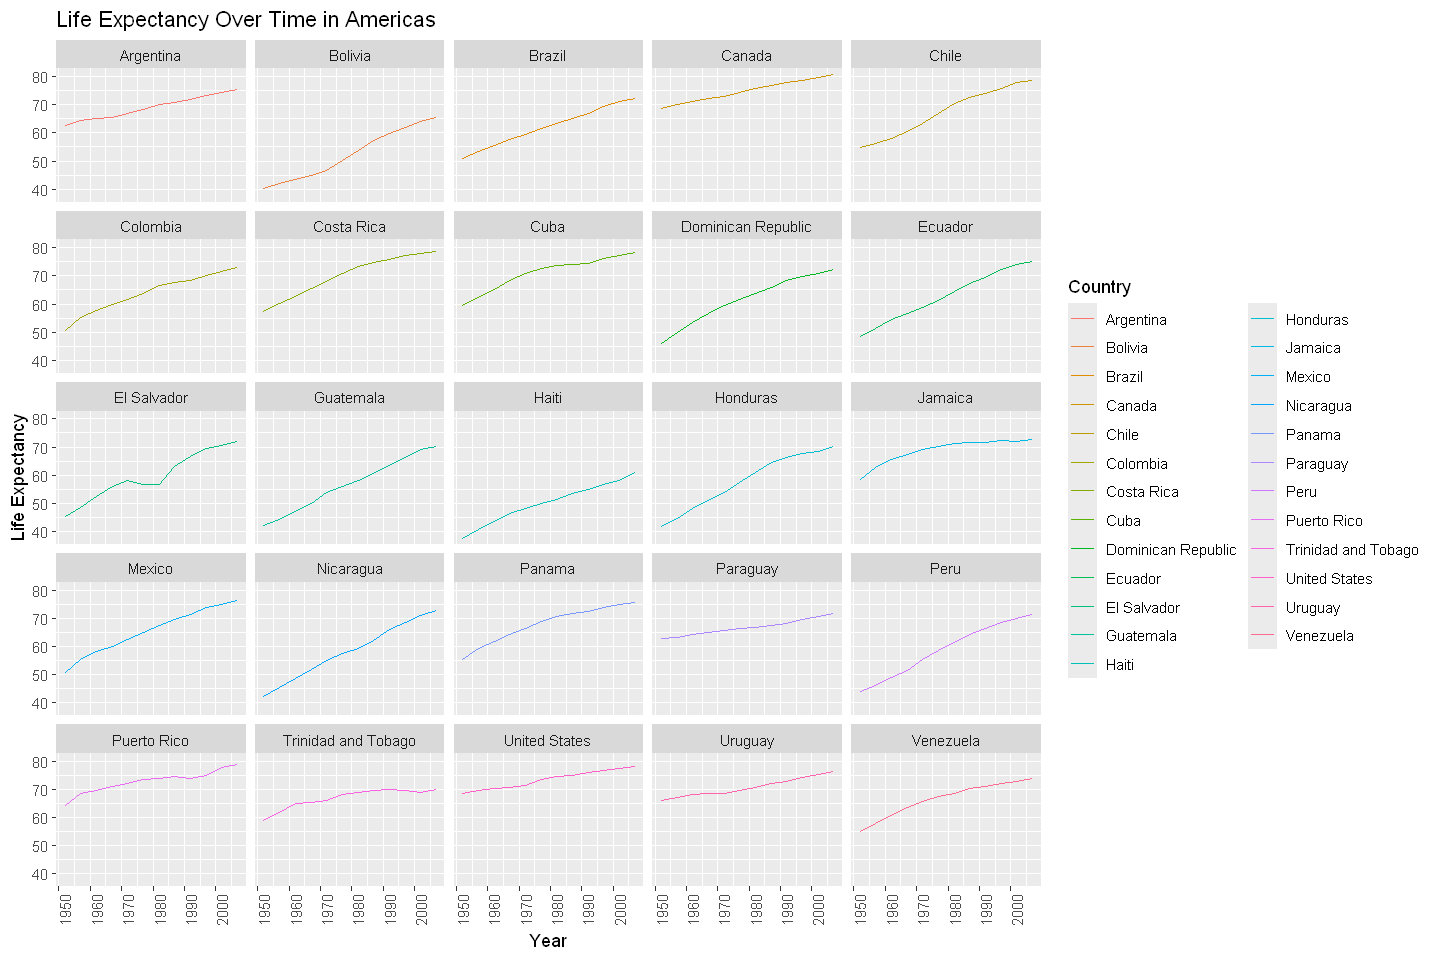

In [ ]:
# INSERT CODE HERE
options(repr.plot.width=12, repr.plot.height=8)
ggplot(americas_data, aes(x = year, y = lifeExp, color=country)) +
    geom_line() +
    facet_wrap(~ country) +
	labs(
		x = "Year",
		y = "Life Expectancy",
    	title = "Life Expectancy Over Time in Americas",
		color = "Country" # Legend seems a little unnecessary in this case :|
	) +
	theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 1)) # need justification



Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

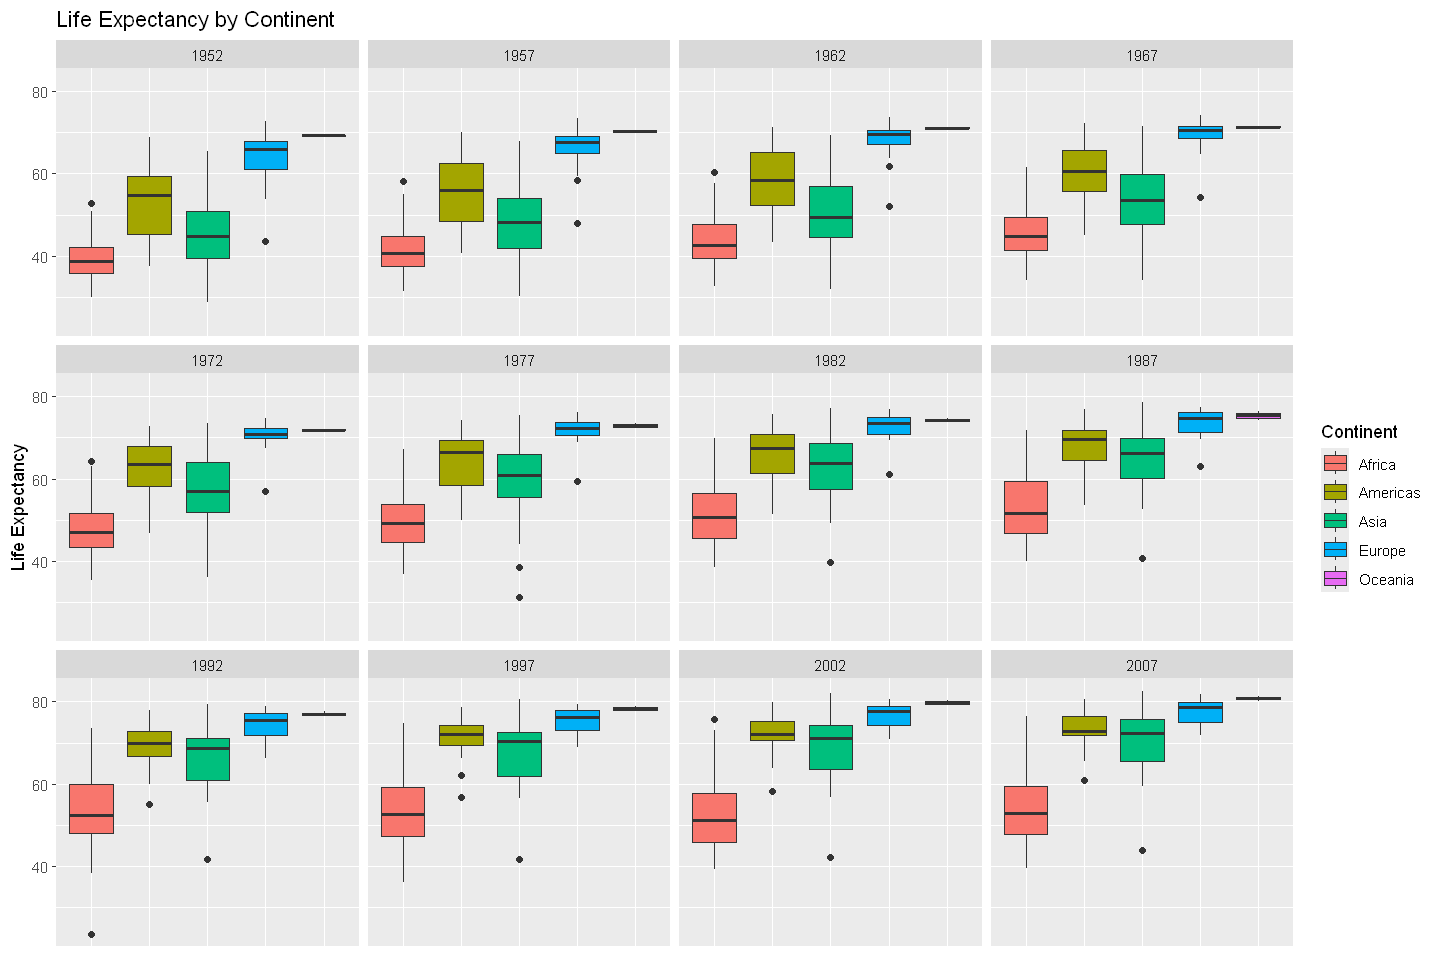

In [ ]:
# INSERT CODE HERE
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
	geom_boxplot() +
	facet_wrap(~ year) +
	labs(
		title = "Life Expectancy by Continent",
		y = "Life Expectancy",
		fill = "Continent"
  	) +
	theme(
		axis.title.x = element_blank(),       # Remove x-axis title
    	axis.text.x = element_blank(),        # Remove x-axis text
    	axis.ticks.x = element_blank(),
	)


---
# 2. Increasing data density (3 pts)

The above plots have nice readability, but they probably use more ink than is necessary. Take your boxplots from the last question and edit them to improve the data-to-ink ratio.

Hint: Double check your axis labels!

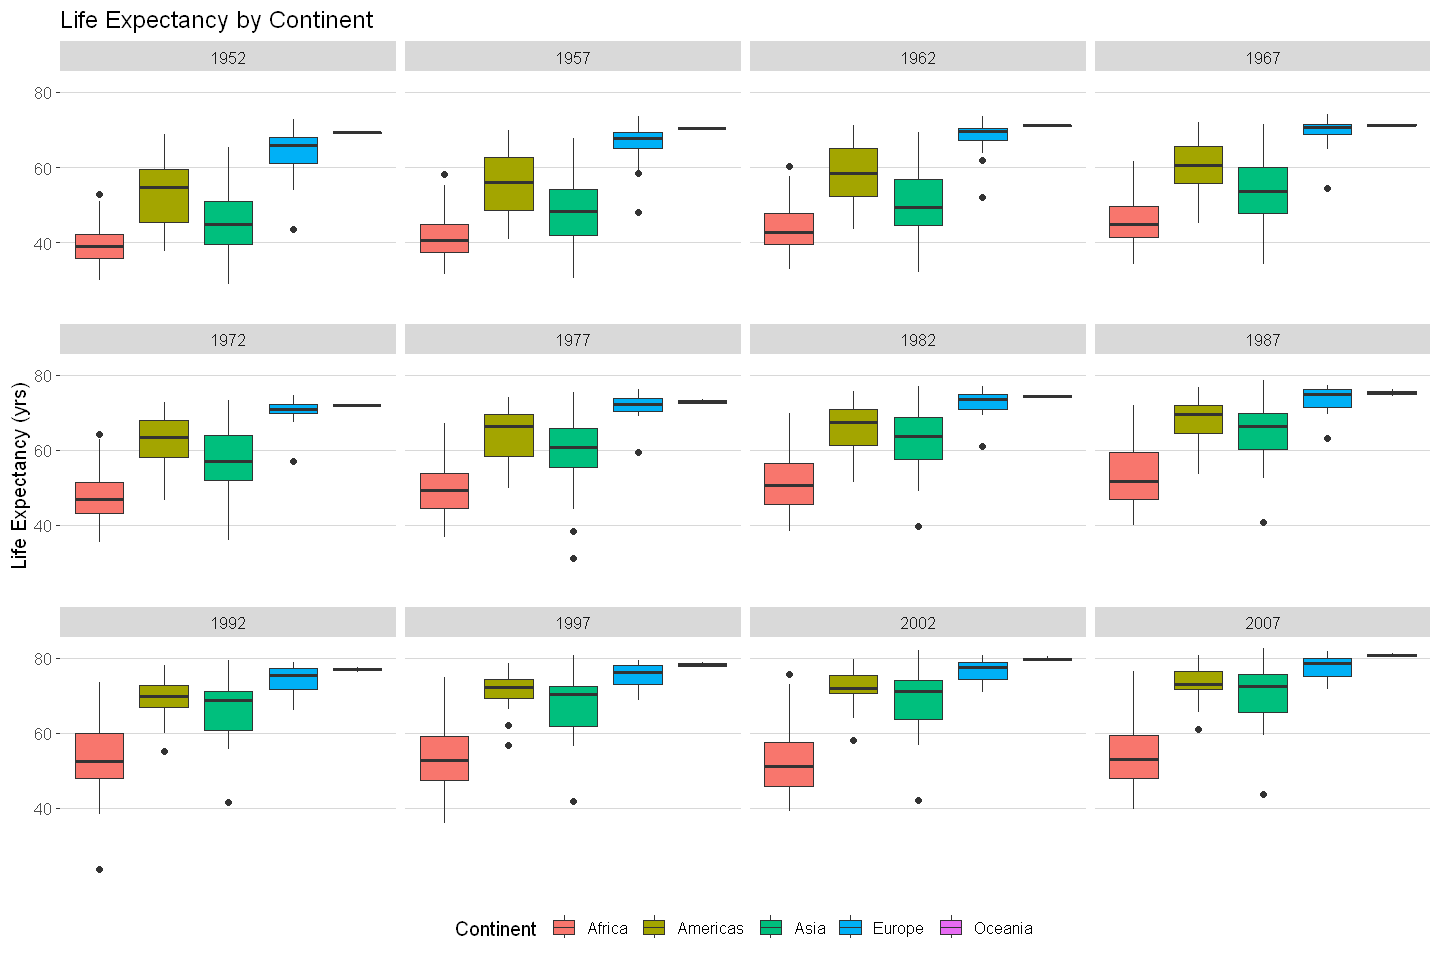

In [ ]:
# INSERT CODE HERE
# install.packages("ggthemes")
library(ggthemes)
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
	geom_boxplot() +
	facet_wrap(~ year) +
	labs(
		title = "Life Expectancy by Continent",
		y = "Life Expectancy (yrs)", # Given the title, the y-axis label also seems optional
		fill = "Continent"
  	) +
  	theme_hc() + # Highcharts JS theme
	theme(
		axis.title.x = element_blank(),       # Remove x-axis title
    	axis.text.x = element_blank(),        # Remove x-axis text
    	axis.ticks.x = element_blank(),
	)


**DUE:** 5pm EST, Feb 17, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*